importando as bibliotecas necessárias

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

importando uma base de dados com o tratamento aplicado.

In [80]:
from script_tratamento_abono import tratamento_abono

df = tratamento_abono("01_2017")

## Análise de bases ao longo do tempo

importando todas as bases de dados entre 2017 e 2021

In [81]:
time_series = []

for year in ['2017', '2018', '2019', '2020', '2021']:
    for month in ['01', '07']:
        filename = f"{month}_{year}"
        base = tratamento_abono(filename)
        time_series.append(base)

### Detecção de ruídos

In [82]:
maior_abono = df.valor_abono.max()
segundo_maior_abono = df[df.valor_abono < maior_abono].valor_abono.max()

print(f"Maior abono: {maior_abono}\nSegundo maior abono: {segundo_maior_abono}")

Maior abono: 23684.62
Segundo maior abono: 16582.59


Os dois maiores valores de abono possuem uma diferença muito grande, com valores exorbitantes. Então, podemos verificar se essas pessoas de fato ganham esse valor todos os meses.

In [83]:
def show_history(NOME):
    """Função que busca o nome de uma pessoa em todas as bases de 2017 a 2021 para mostrar seu histórico de abono durante esse período."""
    filtered_db = []
    for db in time_series:
        filtered_db.append(db[db.nome == NOME])

    values = []
    for db in filtered_db:
        if not db.empty:
            row = db[db.nome == NOME]
            values.append(int(row.valor_abono))
        else:
            values.append(0)
    print(f"Valor de abono de {NOME} recebido entre 2017 e 2021:\n{values}")

In [84]:
# Alguns exemplos de pessoas que receberam mais de 11 mil de abono em janeiro de 2017
nomes_valor_abono_alto = ['SERGIO HENRIQUE GOMES RIBEIRO','AMILCAR RENNER DE VASCONCELLOS',
'JOSIAS PIMENTA DE SOUZA FILHO','CARLOS ALBERTO CUNHA DO NASCIMENTO']

for NOME in nomes_valor_abono_alto:
    show_history(NOME)

Valor de abono de SERGIO HENRIQUE GOMES RIBEIRO recebido entre 2017 e 2021:
[23684, 2241, 2241, 2241, 2241, 2241, 2241, 2981, 2960, 2960]
Valor de abono de AMILCAR RENNER DE VASCONCELLOS recebido entre 2017 e 2021:
[16582, 1582, 1582, 1582, 1534, 1534, 1706, 2179, 2158, 2158]
Valor de abono de JOSIAS PIMENTA DE SOUZA FILHO recebido entre 2017 e 2021:
[13831, 1061, 1061, 1061, 1061, 0, 0, 0, 0, 0]
Valor de abono de CARLOS ALBERTO CUNHA DO NASCIMENTO recebido entre 2017 e 2021:
[12070, 927, 808, 797, 908, 776, 663, 894, 0, 0]


Ao que tudo indica, estes valores exorbitantes indicam erros ou pagamentos retroativos, já que nos meses seguintes as mesmas pessoas recebem quantidades bem menores, logo, podemos descartar estes casos da base de dados para um indicativo mais confiável dos valores de abono.

In [85]:
df[df.valor_abono == 0].shape[0]

656

656 servidores públicos que "recebem" 0 reais de abono, mas ainda assim estão cadastrados na base.

In [86]:
df = df[df.valor_abono < 5000]
df = df[df.valor_abono != 0]
for i in range(len(time_series)):
    time_series[i] = time_series[i][time_series[i].valor_abono < 5000]
    time_series[i] = time_series[i][time_series[i].valor_abono != 0]

Para uma melhor análise dos dados, podemos remover o ruído.

### Análise exploratória dos dados

média do abono permanência ao longo do tempo

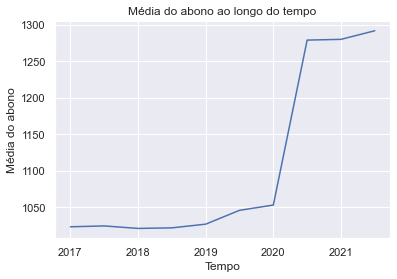

In [87]:
means = []
index = [x for x in range(len(time_series))]
for db in time_series:
    means.append(db.valor_abono.mean())

sns.lineplot(x=index, y=means)
plt.title("Média do abono ao longo do tempo")
plt.xlabel('Tempo')
plt.ylabel('Média do abono')
plt.xticks(ticks=[0,2,4,6,8], labels=[2017, 2018, 2019, 2020, 2021])
plt.show()

mudança na média de abono por consequência das alterações no benefício causadas pela reforma de previdência

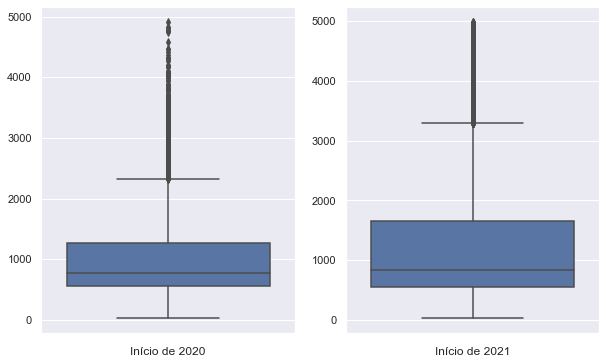

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes = axes.flatten()

sns.boxplot(y=time_series[6]['valor_abono'], ax=axes[0])
axes[0].set_xlabel('Início de 2020')
axes[0].set_ylabel('')

sns.boxplot(y=time_series[8]['valor_abono'], ax=axes[1])
axes[1].set_xlabel('Início de 2021')
axes[1].set_ylabel('')
plt.show()

Comparando lado a lado, é possível ver que o boxplot se expandiu de forma considerável, aumentando o intervalo de valores mais comuns.

In [89]:
df.groupby(df.descricao_cargo)['valor_abono'].describe().sort_values('count', axis=0, ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
descricao_cargo,,,,,,,,
AGENTE ADMINISTRATIVO,10652.0,600.084584,143.539911,153.83,536.6800,556.20,607.2150,4296.56
TECNICO DO SEGURO SOCIAL,8916.0,1044.547038,71.374949,332.14,1020.3100,1029.11,1049.6900,2361.98
PROFESSOR DO MAGISTERIO SUPERIOR,7683.0,1797.953695,587.786008,191.31,1334.5500,1964.84,2218.3800,4723.24
AGENTE DE SAUDE PUBLICA,4574.0,661.461095,74.099963,226.91,641.5600,650.99,662.7900,2794.95
ASSISTENTE EM ADMINISTRACAO,4302.0,760.665116,132.383509,389.41,662.3325,767.65,810.5075,2535.87
AUXILIAR DE ENFERMAGEM,3804.0,591.647926,137.527022,152.54,529.6000,539.33,601.5775,1737.94
DATILOGRAFO,2959.0,741.081014,237.874532,272.04,536.6800,607.92,1019.1000,2252.29
MEDICO,2494.0,1062.860040,354.583000,244.62,820.9800,857.60,1355.5900,3939.82
AUX OPERAC SERVICOS DIVERSOS,2355.0,551.401771,55.167265,182.82,529.6000,535.07,553.1900,1253.77


A maioria dos cargos possuem valores de abono instáveis, portanto não são um bom indicativo do valor de abono.